-03-Basics-of-Statistical-Distributions-and-Analysis © by A.Richter
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import scipy as sp
import scipy.stats as sts
import pandas as pd
import skimage.io as skio
import glob
%matplotlib inline

Equal or **uniform distribution** : Random numbers between 0 and 1
---

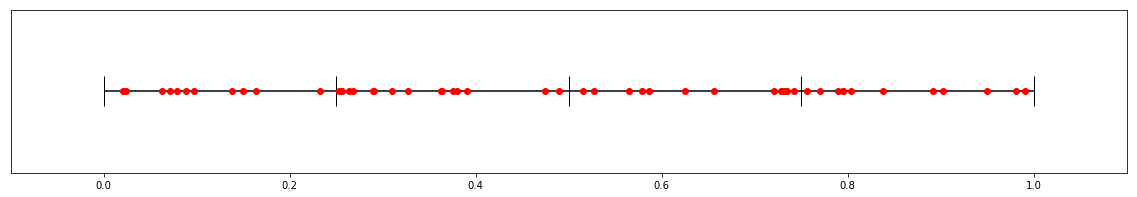

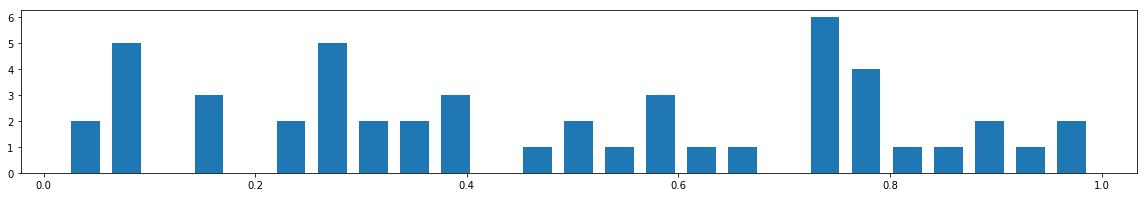

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n=50  # n=100 #n=1000 #n=10000        #Anzahl der Ziehungen "n" verändern
Nums=np.random.rand(n)
#print Nums
a=np.arange(0,1.25,0.25)            # Alle 0.25 Einheiten einen vertikalen Strich
y=np.zeros(a.shape)
fig=plt.figure(figsize=(20,3))
plt.plot(a,y,'k|',ms = 30)          # vertikale Striche in der Graphik plotten

plt.hlines(0,0,1)
plt.plot(Nums,np.zeros((n)),'ro')   # plotten r=rot   o = großer ausgefüllter Punkt   .= kleiner ausgefüllter Punkt
plt.xlim(-0.1,1.1)
plt.ylim(-0.5,0.5)
plt.yticks([])                     # keine y - Beschriftungen
plt.show()

fig=plt.figure(figsize=(20,3))
hist, bins = np.histogram(Nums, bins=25)         #Anzahl der Intervalle, "bins" verändern
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Normalverteilung: Zufallszahlen Mittelwert = 0 und Standardabweichung = 1
---

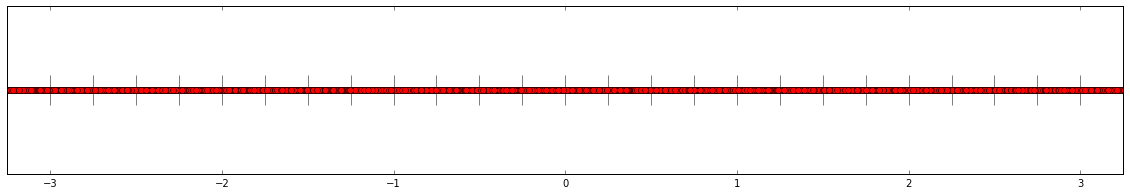

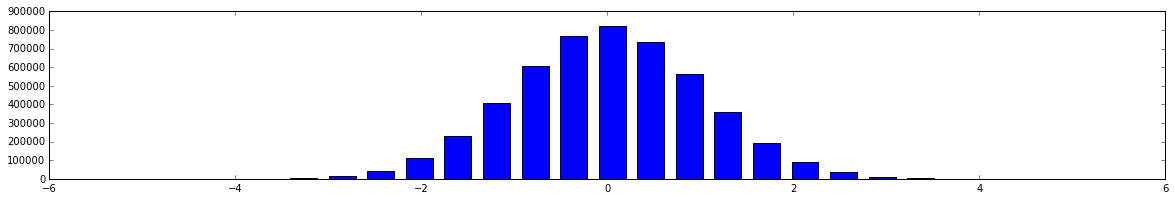

In [5]:
#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline

n=5000000 # n=100 #n=1000 #n=10000               #Anzahl der Ziehungen "n" verändern
Nums=np.random.randn(n)               # Unterschied!!! : randn() statt rand()
#print Nums
a=np.arange(-3,3.25,0.25)
y=np.zeros(a.shape)
fig=plt.figure(figsize=(20,3))
plt.plot(a,y,'k|',ms = 30)

plt.hlines(0,-3,3)
plt.plot(Nums,np.zeros((n)),'ro')
plt.xlim(-3.25,3.25)
plt.ylim(-0.5,0.5)
plt.yticks([])
plt.show()

fig=plt.figure(figsize=(20,3))
hist, bins = np.histogram(Nums, bins=25)          #Anzahl der Intervalle "bins" verändern
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Histogramme
---

http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html

https://plot.ly/matplotlib/histograms/

In [ ]:
#Histogram mittels Funktion  plt.hist()  aus matplotlib

#import numpy as np
#import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()
#=================================================================================


In [ ]:
# 2. Möglichkeit über np.histogram()  wie in den Bsp oben schon verwendent
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
hist, bins = np.histogram(x, bins=25)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Untersuchung von Korrelationskoeffizienten
---

nach Pearson: https://de.wikipedia.org/wiki/Korrelationskoeffizient  | nach Spearman oder Kendall: https://de.wikipedia.org/wiki/Rangkorrelationskoeffizient  

Korrelation nach Pearson

                
Normalverteilte Daten erzeugen: 
x1: [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]
-----------------
x2: [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462 -1.45436567
  0.04575852 -0.18718385  1.53277921  1.46935877  0.15494743  0.37816252
 -0.88778575 -1.98079647 -0.34791215  0.15634897  1.23029068  1.20237985
 -0.38732682 -0.30230275]


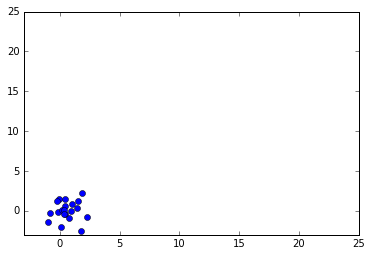

Korrelationsmatrix (Pearson): 
                
[[ 1.          0.08738675]
 [ 0.08738675  1.        ]]
___________________________________
                
 Pearsons Correlation Coefficient: 0.0873867503581


In [3]:
# Pearson Correlation Coef
#scipy.stats.spearmanr()    # Spearman Correlation Coef
print '                '
print 'Normalverteilte Daten erzeugen: '
np.random.seed(0)
x1=np.random.randn(20,1)      # je 20 normalverteilte Zufallszahlen erzeugen für x1 und x2
x2=np.random.randn(20,1)

print 'x1:', np.ravel(x1)     # np.ravel() macht z.B. aus einem 2x2 array eine 1x4 Liste...
print '-----------------'
print 'x2:', np.ravel(x2)

plt.plot(x1,x2,'bo')         # plotten b=blau   o=großer ausgefüllter Punkt   .= kleiner ausgefüllter Punkt
plt.xlim(-3,25)          #Anzeigebereich festlegen
plt.ylim(-3,25)
plt.show()

print 'Korrelationsmatrix (Pearson): '
print '                '
print np.corrcoef(np.ravel(x1),np.ravel(x2) )   # np.corrcoef() erzeugt eine 2x2 Korrelationsmatrix Element 1,2 ist der gewünschte Korrelationskoeffizient 
print '___________________________________'
print '                '
pr =np.corrcoef(np.ravel(x1),np.ravel(x2) )[0,1]   # Python fängt bei 0 an zu zählen 
print ' Pearsons Correlation Coefficient: {}'.format(pr)


vgl. Korrelation nach Pearson, Spearman und Kendall

                
Normalverteilte Daten erzeugen: 
x1: [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]
-----------------
x2: [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462 -1.45436567
  0.04575852 -0.18718385  1.53277921  1.46935877  0.15494743  0.37816252
 -0.88778575 -1.98079647 -0.34791215  0.15634897  1.23029068  1.20237985
 -0.38732682 -0.30230275]


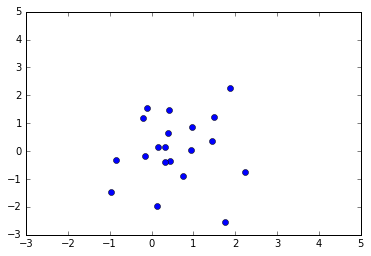

Korrelationsmatrix (Pearson): 
                
[[ 1.          0.08738675]
 [ 0.08738675  1.        ]]
___________________________________
                
 Pearsons Correlation: 0.0873867503581
Spearmans Correlation: 0.108270676692
  Kendall Correlation: 0.115789473684
_____________________________________
                


In [4]:
print '                '
print 'Normalverteilte Daten erzeugen: '
np.random.seed(0)
x1=np.random.randn(20,1)
x2=np.random.randn(20,1)

print 'x1:', np.ravel(x1)
print '-----------------'
print 'x2:', np.ravel(x2)

plt.plot(x1,x2,'bo')
plt.xlim(-3,5)
plt.ylim(-3,5)
plt.show()
print 'Korrelationsmatrix (Pearson): '
print '                '
print np.corrcoef(np.ravel(x1),np.ravel(x2) )
print '___________________________________'
print '                '
pr =np.corrcoef(np.ravel(x1),np.ravel(x2) )[0,1]
print ' Pearsons Correlation: {}'.format(pr)

sr,sp = sts.spearmanr(x1,x2)

print 'Spearmans Correlation: {}'.format(sr)

kr,kp = sts.kendalltau(x1,x2)

print '  Kendall Correlation: {}'.format(kr)
print '_____________________________________'
print '                '

Einfügen eines Fehlers (Outliner) in die Datenreihe

                
                
_____________________________________
                
Fehlerwert (Outliner) einfügen, x1[10] = 18, x2[10] = 18 : 
Korrelationsmatrix (Pearson): 
                
[[ 1.          0.93971012]
 [ 0.93971012  1.        ]]
                
 Pearsons Correlation: 0.939710118783 !!!! 1 falscher Punkt, völlig anderes Ergebnis (0.08738675 vorher)!
_____________________________________


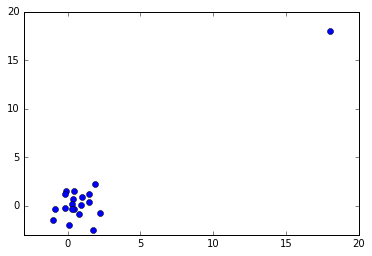

!!!ABER:                
_____________________________________
                
Spearmans Correlation: 0.233082706767
  Kendall Correlation: 0.2
                
_____________________________________


In [5]:
print '                '
print '                '
print '_____________________________________'

print '                '
print 'Fehlerwert (Outliner) einfügen, x1[10] = 18, x2[10] = 18 : '

x1[10]=18
x2[10]=18


print 'Korrelationsmatrix (Pearson): '
print '                '
print np.corrcoef(np.ravel(x1),np.ravel(x2) )
pr =np.corrcoef(np.ravel(x1),np.ravel(x2) )[0,1]
print '                '
print ' Pearsons Correlation: {}'.format(pr), '!!!! 1 falscher Punkt, völlig anderes Ergebnis (0.08738675 vorher)!'
print '_____________________________________'

plt.plot(x1,x2,'bo')
plt.xlim(-3,20)
plt.ylim(-3,20)
plt.show()
print '!!!ABER:                '
print '_____________________________________'
print '                '
sr,sp= sts.spearmanr(x1,x2)
print 'Spearmans Correlation: {}'.format(sr)
kr,kp = sts.kendalltau(x1,x2)
print '  Kendall Correlation: {}'.format(kr)
print '                '
print '_____________________________________'



Jack-Knife Schätzung des Korrelationskoeffizienten und Darstellung in einem Histogramm
-------

https://de.wikipedia.org/wiki/Jackknife_%28Statistik%29

In [ ]:
CorrArr=[]
for i in range(0,len(x1)):
    xjk=[]
    yjk=[]
    xjk=np.delete(x1,i)                  # i-ten Punkt löschen und mit dem Rest die Korrelation berechnen
    yjk=np.delete(x2,i)
    CorrArr.append(np.corrcoef(xjk,yjk)[0,1])
    print '...löschen von Punkt', i , '--> r =  ' ,np.corrcoef(xjk,yjk)[0,1]

#http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.where.html

print '___________________________'
print '   '
print 'Index of Outliner: {}'.format(np.where(CorrArr==np.min(CorrArr))[0] )
print 'Correlation without Outliner: {}'.format(np.min(CorrArr))
print '  '
print '  '
print 'Histogram of Jack-Knife Coorelation Coefficients'
hist, bins = np.histogram(CorrArr, bins=5)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Bootstrapping Schätzung des Korrelationskoeffizienten und Darstellung in einem Histogramm
-------

https://de.wikipedia.org/wiki/Bootstrapping_%28Statistik%29

In [ ]:
CorrArr2=[]
for i in range(0,10000):           # range(0,100)  range(0,1000)   range(0,10000)
    
    x1bs=[]
    x2bs=[]
    x1bs =  np.random.choice(np.ravel(x1),20, replace=True)
    x2bs =  np.random.choice(np.ravel(x2),20, replace=True)
    
    CorrArr2.append(np.corrcoef(x1bs,x2bs)[0,1])

#print len(CorrArr2) 
print 'Mean: {}'.format(np.mean(CorrArr2))
print 'std: {}'.format(np.std(CorrArr2))

print 'Histogram of Bootstrap Estimation of Correlation'
hist, bins = np.histogram(CorrArr2, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Bootstrapping - Schätzung für Regressionsanalyses
----

http://nbviewer.jupyter.org/gist/aflaxman/6871948  | http://people.duke.edu/~ccc14/pcfb/analysis.html

In [1]:
%%latex
Untersuchung der linearen Funktion
\begin{align}
y=6.3 \cdot x + 15            
\end{align}

<IPython.core.display.Latex object>

In [2]:
%%latex
Untersuchung der quadratischen Funktion
\begin{align}
yq=3 \cdot x^2 + 4 \cdot x + 7
\end{align}


<IPython.core.display.Latex object>

In [ ]:
import pandas as pd
from matplotlib.pyplot import *
np.random.seed(0)
x=10*np.random.rand(20,1)   # uniform distributed samples zwischen [0,10]

y=6.3*x+15

yq = 3*x*x + 4*x + 7

y=y+5*np.random.randn(20,1)

yq=yq+5*np.random.randn(20,1)
#print x,y

xyData3 = pd.DataFrame(x)                    # PANDAS Dataframe Spalten mit den zufälligen Werten x,y belegen
xyData3['1'] = pd.DataFrame(y)
#print xyData3
x=np.ravel(x)
y=np.ravel(y)

Schätzung der Funktion durch eine Regressionsanalyse (Polynomial-Fit)
---

In [ ]:
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html
m,b=np.polyfit(x,y,1)

coefficients=np.polyfit(x,yq,2)   
#print coefficients
polynomial = np.poly1d(np.ravel(coefficients))
xs = np.arange(0, 10, 0.1)
ys = polynomial(xs)

#print ' Steigung: {} / y-Schnittpunkt  {}'.format(m,b)
#print b0,b1,b2
#plotten der verteilungen
plt.figure(figsize=(20,10))
plt.plot(x,y,'ro', label='Lineare Funktion, geschaetzte Steigung: {} / y-Schnittpunkt  {}'.format(m,b))
plt.plot(x,yq,'b.',label='quadratische Funktion, geschaetzte Koeffizienten b2,b1,b0={} '.format(np.ravel(coefficients)))
# plotten der Regressionsgeraden darüber
plt.plot(x,m*x+b,'b')

plt.legend()
plt.plot(xs,ys,'g')
plt.show()


Bootstrapping
---

In [ ]:

marr=[]
barr=[]

#zufällige Ziehung von Daten kann unterschiedlich erreicht werden... am besten mal ausprobieren
# xbs=np.random.choice(np.ravel(x),20, replace=True)
# ybs=np.random.choice(np.ravel(y),20, replace=True)      # Über np.random()

# data1 = xyData3.sample(20,replace=True)                 # Über pd.sample()  PANDAS Dataframe 

for i in range(0,1000):
    data1=[]
    xbs=[]
    ybs=[]
    data1 = xyData3.sample(20,replace=True)    #ziehen von 20 Werte-Paaren aus dem Pandas Datenrahmen 
    xbs=np.ravel(data1[0])
    ybs=np.ravel(data1[1])
    mbs=0
    bbs=0
    #punktpaar müssen zusammen gezogen werden, nicht x,y Zuordnung mixen 
    mbs,bbs = np.polyfit(xbs,ybs,1)
    marr.append(mbs)
    barr.append(bbs)
print ' Mean: Steigung: {} /Mean: y-Schnittpunkt  {}'.format(np.mean(marr),np.mean(barr))
print ' Std: Steigung   {} /Std:  y-Schnittpunkt  {}'.format(np.std(marr),np.std(barr))
print '      '
print ' Wahre Werte: y=6.3*x+15 (siehe oben)'

#schleife über i...1000 durchläufe
    # random.choice()  mit zurücklegen über die Daten x,y
    # m[i],b[i] = np.polyfit(xbs,ybs,1)
    #
#mean m,b berechnen 
#var m,b berechnen
#histogramm m
#histogramm b

plt.plot(x,y,'ro')
plt.plot(x,m*x+b,'b')
plt.plot(x,np.mean(marr)*x + np.mean(barr),'g')
plt.plot(x,np.mean(marr)*x + np.mean(barr)+ 2*np.std(barr),'b--')
plt.plot(x,np.mean(marr)*x + np.mean(barr)- 2*np.std(barr),'b--')
#plotten der verteilungen

# plotten der Regressionsgeraden darüber
plt.show()


In [ ]:
print 'Histogram Bootstrap Steigungs-Paramter'
hist, bins = np.histogram(marr, bins=15)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

print ' Mean(Steigung) :  {} '.format(np.mean(marr))
print '  Std(Steigung) : ±{} '.format(np.std(marr))
print '      '
print ' Wahre Werte: m = 6.3'


In [ ]:
print 'Histogram Bootstrap y-Schnittpunkt'
hist, bins = np.histogram(barr, bins=15)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

print ' Mean(y-Schnitt) :  {} '.format(np.mean(barr))
print '  Std(y-Schnitt) : ±{} '.format(np.std(barr))
print '      '
print ' Wahre Werte: n = 15'
